# Lab Activity 7: Support Vector Machines

The goal of this lab activity is to demonstrate the use of support vector machines for classification using the tools available in `scikit-learn`.

This activity is adapted from M&uuml;ller and Guido, *Introduction to Machine Learning with Python*, pg 58-68 and 94-105. 
As in certain previous labs, the code is drawn from what is available from the GitHub
repositories supporting 
[the M&uuml;ller and Guido book](https://github.com/amueller/mglearn/tree/master/mglearn).

Also, while I have your attention, I'd like to remind you all that the syllabus policy

>  Please keep all
laptops, tablets, phones, etc, silenced and put away. If you absolutely need to check your phone
for something, please discreetly step out in to the hall.

applies in lab as well as in lecture. 
Keep those phones put away.
Check out this article sometime: [Your Smartphone Reduces Your Brainpower, Even if It's Just Sitting there](https://getpocket.com/explore/item/your-smartphone-reduces-your-brainpower-even-if-it-s-just-sitting-there).

## 1. Linear models for classification

The general context for using support vector machines is classifying data using linear formulas that discriminate among classes. As we saw in class on Monday, we separate data points in different classes using a hyperplane defined by

$$
\mathbf{w}\cdot \mathbf{x} + b = 0
$$

...with points classified by whether they give a positive or negative value for $\mathbf{w}\cdot \mathbf{x} + b$. 
There are several approaches to classification based on hyperplanes, not just SVMs. 
They differ from each other on how to find an appropriate hyperplane based on the data, how to tolerate
(or otherwise deal with) misclassifications, etc.

One point of comparison for support vector machines is *logistic regression*, so called because it uses the logistic sigmoid function (also note that we are here applying it to classification, not regression).
Before getting into details of either approaches, consider this example of applying them to a training data set using their `scikit-learn` implementation with default parameters. (If you get deprecation warnings, don't worry about them.)


[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


/usr/lib64/python3.4/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib64/python3.4/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib64/python3.4/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


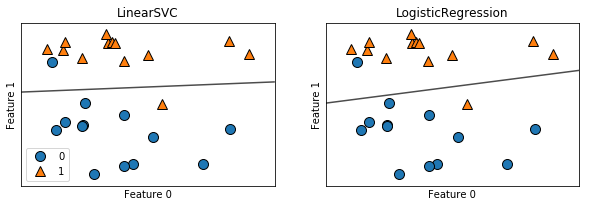

In [5]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import mglearn

X, y = mglearn.datasets.make_forge()

print(X)
print(y)
# print(type(X))
# print(type(y))

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

The `C` in `LinearSVC` is for *classifier*. The data is not linearly separable, and although the lines drawn by `LinearSVC` and `LogisticRegression` aren't too far off, you can see that they do draw different lines.
(I would like to have the actual support vectors appear in the SVM plot, but `LinearSVC` doesn't store the
support vectors themselves, just the hyperplane.)

In class last time we talked about how a soft margin classification is parameterized by `C`
(which the `scikit-learn` documentation calls the *penalty parameter*). 
Consider the effect on the classification by these various settings of that parameter.

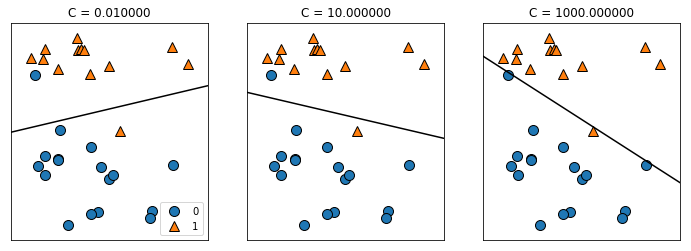

In [5]:
from sklearn.datasets import make_blobs
from mglearn.plot_helpers import discrete_scatter
import numpy as np

X, y = make_blobs(centers=2, random_state=4, n_samples=30)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# a carefully hand-designed dataset 
y[7] = 0
y[27] = 0
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

for ax, C in zip(axes, [1e-2, 10, 1e3]):
    discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

    svm = LinearSVC(C=C, tol=0.00001, dual=False).fit(X, y)
    w = svm.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(6, 13)
    yy = a * xx - (svm.intercept_[0]) / w[1]
    ax.plot(xx, yy, c='k')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("C = %f" % C)
axes[0].legend(loc="best")

What do you observe? 
How many points are misclassified, and how far off are they?
Which displays evidence of overfitting?

## 2. Multiclass classification

Our discussion in class assumed binary classification, and in fact a straight-up
linear approach inherently applies only to two classes.
There are still ways to extend the idea to more than two classes.
One way is to break the problem up into several binary classification problems, one
for each class. 
The idea is that each of several classifiers can distinguish one class from all the others,
called *one-vs-rest*.
For a new data point, each classifier tests that point and identifies it as either in or out of
the class. 

Ideally, exactly one classifier accepts that new point.
If no classifier identifies the point as being in-class, then the point will have to be tagged
as whatever class it was closest to.
If more than one classifier accepts the point, then the tie will have to be broken
by some measurement of how confident the classifiers are.

Here we try this out with three classes:

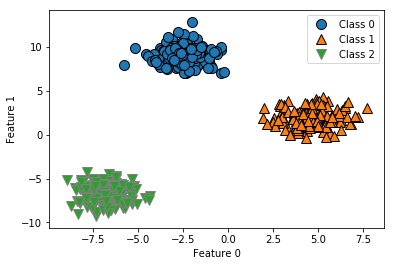

In [21]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=42,n_samples=500)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

x_train,x_test,y_train,y_test = train_test_split(X,y)

These classes are linearly separable, so they should be easy to classify. 
Let's fit an SVM classifier to them. A `LinearSVC` has an array of coefficients 
($\mathbf{w}$, since they are analogous to what we call *weights* in other contexts)
and an intercept ($b$, analogous to the *bias*).

In [37]:
linear_svm = LinearSVC().fit(x_train, y_train)

print(linear_svm.score(x_test,y_test))

print(str(linear_svm.coef_))
print(str(linear_svm.intercept_))

1.0
[[-0.21859155  0.29508272]
 [ 0.57290858 -0.13443909]
 [-0.24269017 -0.22937792]]
[-1.25445381  0.13988045 -0.13933528]


/usr/lib64/python3.4/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Make sure you understand what these numbers mean and why the arrays have the shape that they do.
Now we plot the lines with the data.

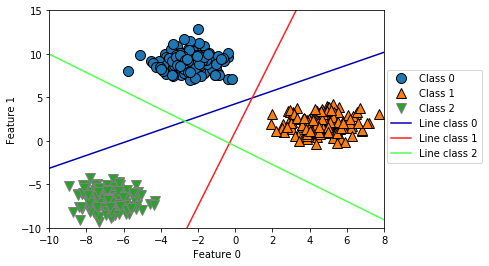

In [23]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

We have three us-vs-them lines. 
There are three regions where there is no ambiguity about how a new data point would be classified,
and the training data are all nicely in an appropriate region.
There are also three overlap regions, and a "no man's land" in the middle. 
We can visualize how the decisions would go in these cases by shading the 
plot by class:

Text(0,0.5,'Feature 1')

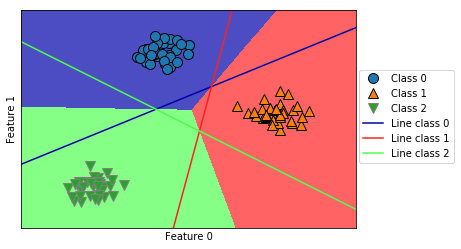

In [9]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The protocol for disambiguating points that land in overlap regions
or no-man's land is straightforward: find the closest boundary line.
How well does this perform?
Go back to the beginning of this section and revise the code so that it generates a
larger set of data (the `n_samples` parameter to `make_blobs`).
Split that into training and test sets, and test the accuracy.

(Remember that there are library functions that make this easy such as
`sklearn.model_selection.train_test_split`.
Like other classifiers, `LinearSVC` has a `score` method to compute accuracy on
a test set.)

## 3. SVMs and non-linearly-separable data

The SVM classifiers we've looked at so far are called *linear* in scikit learn because they are not kernelized, and `LinearSVC` does not directly support using kernels.
If the data isn't even close to being linearly separable, then there is little one can do 
using only linear models.
Consider this example:

Text(0,0.5,'Feature 1')

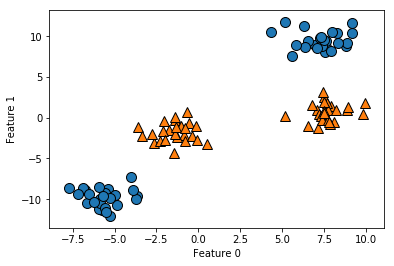

In [38]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Try fitting a linear SVM to this.

/usr/lib64/python3.4/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0,0.5,'Feature 1')

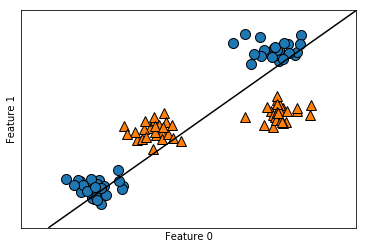

In [39]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In class we talked about adding dimensionality to a dataset to make the data separable.
Of course this data is separable, just not *linearly* separable.
It turns out that in this example, squaring "feature 1" sharply discriminates the blues
(high absolute value for feature 1) from the the oranges (low absolute value for feature 1).

Text(0.5,0,'feature1 ** 2')

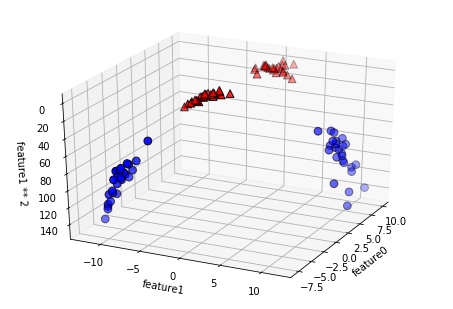

In [40]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

And now we can make a plane that slices the data, putting the orange on one side and the blue on the other. 
Here we train an SVM on the new features. Note that this is still using `LinearSVC`, because we transformed the data ourselves and are now applying a linear SVM to that transformed data---that's different from using an SVM classifier that itself supports kernelization.

/usr/lib64/python3.4/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5,0,'feature1 ** 2')

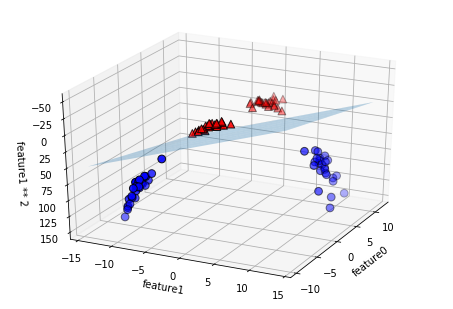

In [41]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Now we can take that classifier and apply it to the original data set.
We can see how the plane is projected on the original feature space by coloring the background. 
This shows us the decision boundary.

Text(0,0.5,'Feature 1')

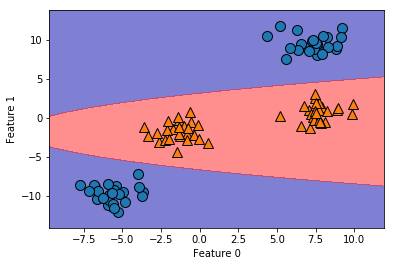

In [42]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## 4. Kernelized SVMs

The class `sklearn.svm.SVC` is parameterized by choice of kernel.
It also differs from `LinearSVC` in that it does not store the coefficients and
intercept for a discriminating line but rather the support vectors themselves---that is,
it stores the vectors close to the boundary and which therefore define or *support*
the boundary for classification.
See [the documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
and compare it with [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html).

Predictions for new datapoints are made by comparing the distance to the support vectors of 
the various classes.
The kernel function is used as a distance measure.
A commonly used kernel is the *Gaussian kernel*, which 
is somehow derived from the Gaussian distribution.
(I've scoured many sources on Kernelized SVMs, but they're all pretty short on 
intutition behind the Gaussian kernel. 
They tend to describe it as "widely-used", or "one of the first kernels studied"
or "produces good results".)
The formula is

$$
k_\mbox{rbf}(x_1, x_2) = e^{-\gamma || x_1 - x_2 ||^2}
$$

The double bars indicate the L2 norm (Euclidean distance). 
The parameter $\gamma = \frac{1}{2 \sigma^2}$ stands in for the standard deviation
and is used to control the width of the bell-curve. 
The subscript *rbf* is because this is also known as the *radial basis function*
(improperly so, as far as I can tell---this is, in fact, only one kind of radial basis function,
but that's another story).

Let's observe this in practice. The support vectors themselves are highlighted.

Text(0,0.5,'Feature 1')

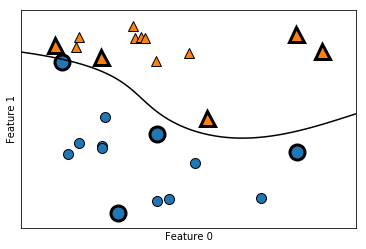

In [55]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=.3).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The boundary is non-linear.
Play around with the parameters in the above code (mainly `C` and `gamma`) and see what happens.
Then try the following code which varies the parameters more systematically.

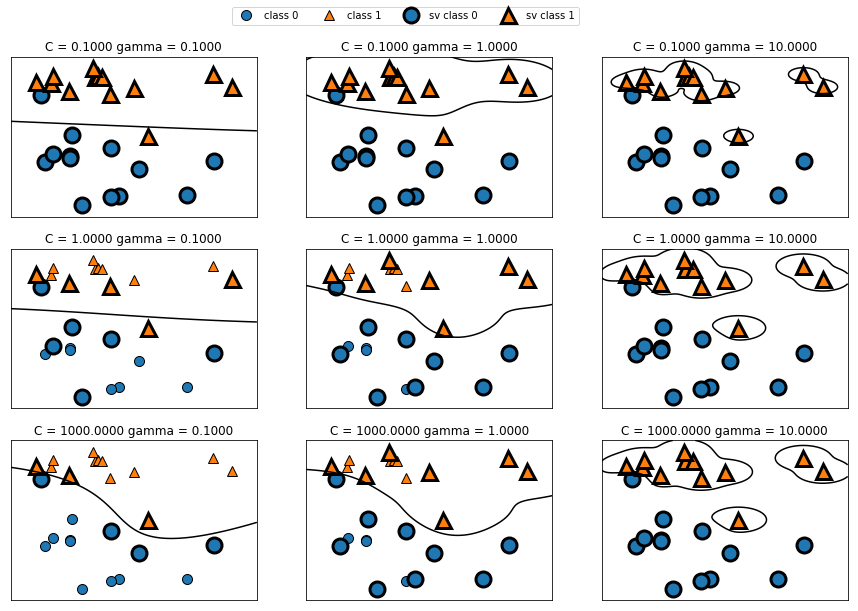

In [56]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

Summarize what you can observe as $\gamma$ increases (left to right) and as `C` increases (top to bottom).

One thing I have not figured out is how the support vectors themselves are determined. 
In class Monday we talked about using linear SVMs for binary classification on linearly separable
data, and in that case each class had one support vector, and the two support vectors (one from each class)
were used to define the hyperplane. 
But in these cases it appears classes have many support vectors.

## 5. SVMs and the data

Now let's try this on some real data.
The following code will load the breast cancer data set and train an SVM using 
the default parameters (which you can look up in 
[the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) ).


In [57]:
from sklearn.model_selection import train_test_split
cancer = sklearn.datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


/usr/lib64/python3.4/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


That's a pretty low score on the test set.
The high score on the training set looks like overfitting.
Can you do better by adjusting the parameters?

Of course in real life we don't want to fiddle with the parameters blindly.
Let's see if looking at the data tells us something.
The following code makes a "min-max" plot of the features in this data set.
Each bar shows the range of values for a particular feature. 
Note that the vertical axis is on a log scale.

Text(0,0.5,'Feature magnitude')

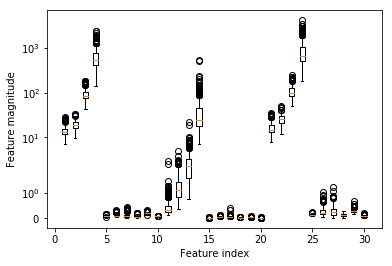

In [58]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

What this shows us is that different features are on very different scales, and some
have large ranges, others small. 
The differences are in orders of magnitude.
For good performance, SVMs need the features to be similarly scaled.

We can help by preprocessing (rescaling) the data. 
Let's rescale each feature so that the values range from 0 to 1.

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


Text(0,0.5,'Feature magnitude')

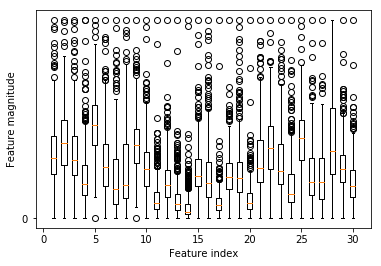

In [60]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training

# Sanity check
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

plt.boxplot(X_train_scaled, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [61]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

Let's see how that does.

In [69]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


/usr/lib64/python3.4/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Well, that's a lot better. But now we aren't getting the training set perfectly. 
Let's increase `C`. Remember, larger `C` means fewer misclassifications on the test set.

In [78]:
best = 1
perc = .1
for c in range(1000):
    svc = SVC(C=c+1,gamma='auto')
    svc.fit(X_train_scaled, y_train)
    val = svc.score(X_train_scaled, y_train)
    if val > perc:
        best = c
        perc = val
print(best)

svc = SVC(C=best,gamma='auto')
svc.fit(X_train_scaled, y_train)
val = svc.score(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

370
Accuracy on training set: 0.986
Accuracy on test set: 0.972


Tada. If time permits, try this on other data sets (digits, iris, etc).